# Homework 1: Simulation, and probability

## Question 0. Goat, please

I have two chickens and one goat, and am going to give one to you,
but you have to pick *randomly*.
We have three barn stalls that you can't see in, and I put one animal in each stall,
in a randomly chosen order.
Let us suppose that you would like to get a chicken (the goat won't fit in your apartment).
You then pick a stall.
Then, I open one of the *other* stalls that has a chicken in it (I can always do this),
and remove that chicken.
Now, you have the choice of either taking what's in the stall you originally picked,
or taking what's in the *other* (as yet unopened) stall.

**(a)** First, decide whether you'd like to switch stalls in the last step or not.
    Then, write python code to simulate from this procedure.
    The code should explicitly represent what happens (e.g., which animal is in which stall),
    and produce either `"chicken"` or `"goat"`, corresponding to which animal you get in the end.
    
**(b)** Use your code to simulate at least 10,000 times.
    Report how often you get a chicken.

Here's one way to choose random numbers:

In [4]:
import numpy as np
rng = np.random  #or, you may need to say: rng = np.random.default_rng()
u = rng.uniform(size=1)
k = rng.choice([0, 1, 2])
print(f"Here is a random number between 0 and 1: {u} and a random integer in (0, 1, 2): {k}")

Here is a random number between 0 and 1: [0.89571783] and a random integer in (0, 1, 2): 2


In [6]:
#A) Yes I decided to switch in the last step because I already know what was in stall 1 (with probability 1:3)
# So with knowing what was behind the first stall its better to change and my odds would double 2:3.
# I get better odds after the first stall was opened to me, so I decided to change.

import numpy as np

stall = ["chicken", "chicken", "goat"] #Created our stall(s)

#Beginning with 0's
total_chicken = 0
total_goat = 0

rng = np.random.default_rng()

#started a forloop up to 10,0000, if it reaches one it adds.
for i in range(10000):
    current_animal = rng.choice(stall)
    if current_animal == "goat":
        total_goat += 1
    else:
        total_chicken += 1


#prints both chicken and goat count
print(f"Chicken count: {total_chicken}")
print(f"Goat count: {total_goat}")


Chicken count: 6735
Goat count: 3265


## Question 1. The geometric distribution

Wikipedia tells us that the [Geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution)
is "the number $X$ of [Bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial)
needed to get one success",
and so if $X$ has the Geometric distribution with parameter $p$,
then
$$ \mathbb{P}\{ X = k \} = (1 - p)^{k-1} p, $$
for $k \in \{1, 2, 3, \ldots\}$.
(There's another nearly-the-same definition,
but this is the version numpy.random provides.)
A "Bernoulli trial" with probability $p$ is just something that is 1 with probability $p$
and 0 with probability $1-p$.

Check this:

*(a)* write a function that takes $p$ as an argument, simulates Bernoulli trials
    until the first success, and returns the number of trials;

*(b)* use this function to simulate many (at least 1,000) draws from the Geometric(1/3); and

*(c)* compare the result to the same number of draws from the numpy.random implementation
    by making a table of the number draws that take the value $k$ for $0 \le k \le 20$.
    (If they are not similar, go back and fix your function.
    To get an idea of what is "similar", re-run the code and see how much they change.)

You may want to use these methods:

In [10]:
import numpy as np
rng = np.random.default_rng()
# rng.uniform() < p   # this is True with probability p
# x = rng.geometric( ... )  # numpy.random's implementation

In [12]:
# Part 1A - using p has an argument that simulates the Bernoulli trial until the first success and returns the rest

def bernoulli_trials(p):
    number_trials = 0
    success = False
    
    while success == False:
        number_trials += 1
        success = np.random.rand() < p
        
    return number_trials

# Part 1B - simluate atleast 1000 draws 
p = 1/3
number_sim = 1000

trials = []

for i in range(number_sim):
    temp = bernoulli_trials(p)
    trials.append(temp)
    
np_data = np.random.geometric(p, number_sim)

#Part 1C - compares the results and numbers from random
k_max = 20

distance = {}
np_distance = {}

for k in range(1, k_max + 1):
    distance[k] = trials.count(k)
    np_distance[k] = list(np_data).count(k)


#Prints the outcome to produce the k, custom, and Numpy
for k in range(1, k_max + 1):
    print(f"k = {k} : Custom = {distance.get(k,0)}, Numpy = {np_distance.get(k,0)}")

k = 1 : Custom = 347, Numpy = 321
k = 2 : Custom = 221, Numpy = 235
k = 3 : Custom = 143, Numpy = 160
k = 4 : Custom = 93, Numpy = 107
k = 5 : Custom = 65, Numpy = 60
k = 6 : Custom = 43, Numpy = 41
k = 7 : Custom = 30, Numpy = 20
k = 8 : Custom = 23, Numpy = 24
k = 9 : Custom = 7, Numpy = 11
k = 10 : Custom = 9, Numpy = 5
k = 11 : Custom = 7, Numpy = 6
k = 12 : Custom = 4, Numpy = 4
k = 13 : Custom = 2, Numpy = 4
k = 14 : Custom = 0, Numpy = 1
k = 15 : Custom = 1, Numpy = 0
k = 16 : Custom = 1, Numpy = 0
k = 17 : Custom = 3, Numpy = 1
k = 18 : Custom = 0, Numpy = 0
k = 19 : Custom = 0, Numpy = 0
k = 20 : Custom = 0, Numpy = 0


## Question 2. Ascending sums

For each $i \ge 1$, Let $D_i$ be a random number drawn
independently and uniformly from $\{1, 2, 3, 4, 5, 6\}$.
Let $$ K = \min\{ k \ge 1 \;:\; D_{k+1} < D_k \} , $$
i.e., $K$ is defined by the fact that
$D_{K+1}$ is the first number that is smaller than the one before it.
Finally, let
$$ X = \sum_{i=1}^K D_i . $$

**a.** Describe in words what the above sum means, and explain how to simulate $X$ using fair dice.

**b.** Write a function to simulate $X$ (in python).
    The function should have one argument, `size`,
    that determines the number of independent samples of $X$ that are returned.

**c.** Make a plot describing the distribution of $X$, and estimate its mean (by simulating at least $10^5$ values).

**PART A**

The sum means the total of series of dice rolls starting from the first roll and counting until the dice roll is less than the previous rolls. To simulate the dice, begin with rolling and writing down the result, then again adding together, BUT if the dice results into a value that is less than its previous roll which endicates the sum of means.

In [17]:
import numpy as np

def simulate_X(size):
    roll_sum = [] #begins with an empty set to add the sum of rolls

#forloop for the number of the size
    for i in range(size):
        first_roll = np.random.choice([1,2,3,4,5,6]) #dice roll from 1-6
        total_sum = first_roll #first roll
        while True:
            next_roll = np.random.choice([1,2,3,4,5,6])
            if next_roll < first_roll: #checks for the next role if its smaller, then it'll move forward to break
                break #break the loop if the next roll is smaller which ends up stopping the sum
            total_sum += next_roll
            first_roll = next_roll
            
        roll_sum.append(total_sum) #stores in list
        
    return np.array(roll_sum)

simulate_X(10)


array([13, 12,  5,  6,  9, 11,  4, 10,  2, 14])

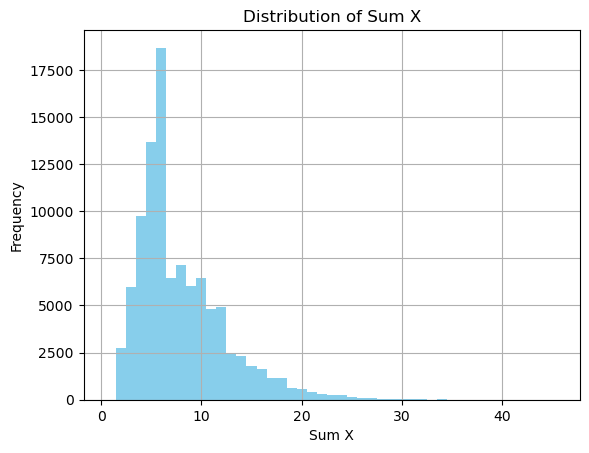

Estimated Mean of X: 7.97838


In [19]:
import matplotlib.pyplot as plt

#simulates 100,000 samples
sample_size = 10**5
sample = simulate_X(sample_size)

#plotting of the samples; Size, design, x and y labels

plt.hist(sample, bins=range(1, max(sample)+1), align='left', color='skyblue')

#titles of graphs
plt.title('Distribution of Sum X')
plt.xlabel('Sum X')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#mean_x estimates the mean of X
mean_X = np.mean(sample)
print("Estimated Mean of X:", mean_X)
